In [1]:
# !pip install arch

In [17]:
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pandas as pd
from arch.unitroot import ADF, PhillipsPerron, KPSS

In [3]:
bist = yf.download("XU100.IS", period="2y", interval="1d")
bist.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-09-08,1454.800049,1457.300049,1432.500000,1433.900024,1433.900024,1951801300
2021-09-09,1431.000000,1452.699951,1427.800049,1452.699951,1452.699951,1692677500
2021-09-10,1455.500000,1457.099976,1437.599976,1438.699951,1438.699951,1509835900
2021-09-13,1439.800049,1448.000000,1433.800049,1438.300049,1438.300049,1604110300
2021-09-14,1440.699951,1443.500000,1429.000000,1434.400024,1434.400024,1744666800


In [4]:
bist.index.dtype

dtype('<M8[ns]')

In [5]:
bist.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

 with graph
 -----

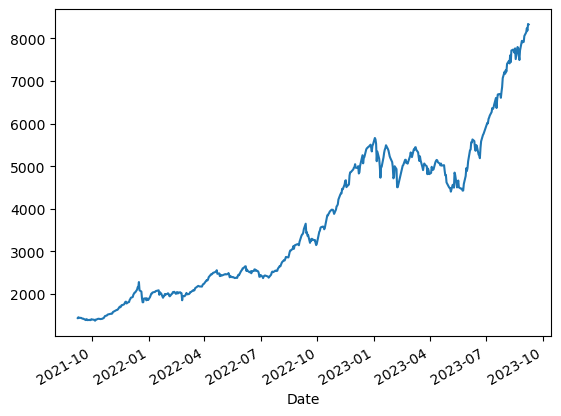

In [6]:
bist["Close"].plot()
plt.show();

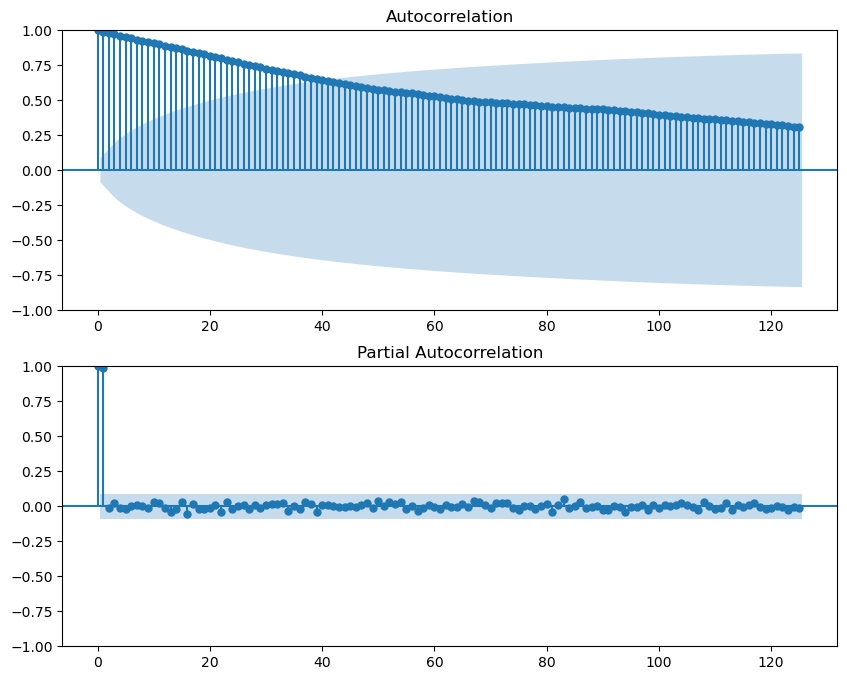

In [7]:

fig, (ax1, ax2) = plt.subplots(2,1, figsize = (10,8))
plot_acf(bist["Close"], lags = len(bist) / 4, ax=ax1)
plot_pacf(bist["Close"], lags = len(bist) / 4, ax=ax2)
plt.show();

In [8]:
# Otokorelasyonun aşağıya doğru iniyor olması serinin durağan olmadığının göstergesidir.

with Augmented Dickey Fuller Test
-----

H0: Durağan değildir.

H1: Durağandır.

In [9]:
df = pd.read_excel("C:/Users/htcso/Downloads/EVDS.xlsx")

In [10]:
df.head()

,Tarih,TL
0,2011-02,473.75
1,2011-03,487.00
2,2011-04,482.00
3,2011-05,511.50
4,2011-06,529.75


In [11]:
df.isnull().sum()

Tarih    0
TL       0
dtype: int64

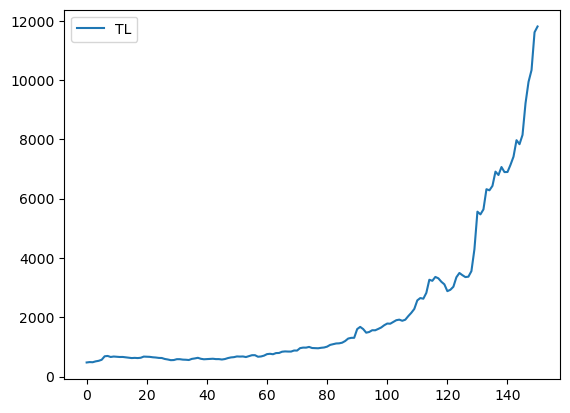

In [12]:
df.plot()
plt.show()

In [13]:
adf = ADF(df["TL"])
adf

Test Statistic,7.410
P-value,1.000
Lags,14


In [14]:
# P-value	1.000. 0.05'ten küçük olmadığı için durağan değildir.
# Lags	14 gecikme değeri

In [15]:
adf.regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     13.46
Date:                Mon, 11 Sep 2023   Prob (F-statistic):           2.87e-19
Time:                        07:43:33   Log-Likelihood:                -863.43
No. Observations:                 136   AIC:                             1759.
Df Residuals:                     120   BIC:                             1805.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Level.L1       0.1851      0.025      7.410      0.000       0.136       0.235
Diff.L1       -0.1469      0.101     -1.456      0.148      -0.347       0.053
Diff.L2       -0.5096      0.103     -4.939      0.000      -0.714      -0.305
Diff.L3       -0.0845      0.106     -0.798      0.426      -0.294       0.125
Diff.L4       -0.4360      0.102     -4.281      0.000      -0.638      -0.234
Diff.L5       -0.2407      0.102     -2.362      0.020      -0.442      -0.039
Diff.L6       -0.1467      0.099     -1.475      0.143      -0.344       0.050
Diff.L7       -0.2309      0.104     -2.229      0.028      -0.436      -0.026
Diff.L8       -0.2603      0.105     -2.476      0.015      -0.468      -0.052
Diff.L9       -0.3502      0.106     -3.290      0.001      -0.561      -0.139
Diff.L10      -0.5239      0.109     -4.791      0.000      -0.740      -0.307
Diff.L11      -0.2066      0.109     -1.897      0.060      -0.422       0.009
Diff.L12      -0.6087      0.114     -5.333      0.000      -0.835      -0.383
Diff.L13       0.1882      0.113      1.672      0.097      -0.035       0.411
Diff.L14      -0.5197      0.115     -4.535      0.000      -0.747      -0.293
const       -112.0193     23.104     -4.848      0.000    -157.764     -66.275
==============================================================================
Omnibus:                       46.930   Durbin-Watson:                   2.198
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              329.903
Skew:                           0.945   Prob(JB):                     2.30e-72
Kurtosis:                      10.392   Cond. No.                     6.10e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
adf2 = ADF(df["TL"], trend="n", method="aic")
adf2.regression.summary()

# trend => n: sabit terimsiz ve trendsiz, c: sabit terimli ancak trendsiz, ct: sabit terimli ve trendli
# method => aic, bic, t-stat

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.606
Model:                            OLS   Adj. R-squared (uncentered):              0.557
Method:                 Least Squares   F-statistic:                              12.40
Date:                Mon, 11 Sep 2023   Prob (F-statistic):                    4.25e-18
Time:                        07:43:33   Log-Likelihood:                         -875.59
No. Observations:                 136   AIC:                                      1781.
Df Residuals:                     121   BIC:                                      1825.
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Level.L1       0.0939      0.018      5.247      0.000       0.058       0.129
Diff.L1        0.0782      0.098      0.801      0.425      -0.115       0.271
Diff.L2       -0.2924      0.101     -2.889      0.005      -0.493      -0.092
Diff.L3        0.1453      0.103      1.410      0.161      -0.059       0.349
Diff.L4       -0.2946      0.106     -2.772      0.006      -0.505      -0.084
Diff.L5       -0.1070      0.107     -1.002      0.319      -0.319       0.105
Diff.L6       -0.0473      0.106     -0.446      0.656      -0.257       0.163
Diff.L7       -0.1227      0.110     -1.114      0.268      -0.341       0.095
Diff.L8       -0.1582      0.112     -1.411      0.161      -0.380       0.064
Diff.L9       -0.2330      0.113     -2.064      0.041      -0.457      -0.010
Diff.L10      -0.3809      0.115     -3.321      0.001      -0.608      -0.154
Diff.L11      -0.0639      0.114     -0.560      0.577      -0.290       0.162
Diff.L12      -0.4029      0.115     -3.492      0.001      -0.631      -0.174
Diff.L13       0.3720      0.115      3.224      0.002       0.144       0.600
Diff.L14      -0.3414      0.118     -2.888      0.005      -0.575      -0.107
==============================================================================
Omnibus:                       77.364   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              540.303
Skew:                           1.861   Prob(JB):                    4.73e-118
Kurtosis:                      12.028   Cond. No.                         46.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

with Phillips Perron Test
-----

H0: Durağan değildir.

H1: Durağandır.

In [19]:
pp = PhillipsPerron(df["TL"])
print(pp)   # P-value	1.000. 0.05'ten küçük olmadığı için durağan değildir.

     Phillips-Perron Test (Z-tau)    
Test Statistic                 12.986
P-value                         1.000
Lags                               14
-------------------------------------

Trend: Constant
Critical Values: -3.47 (1%), -2.88 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [20]:
pp.regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 1.633e+04
Date:                Mon, 11 Sep 2023   Prob (F-statistic):          2.27e-153
Time:                        07:49:59   Log-Likelihood:                -993.45
No. Observations:                 150   AIC:                             1991.
Df Residuals:                     148   BIC:                             1997.
Df Model:                           1                                         
Covariance Type:                  HAC                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Level.L1       1.0501      0.008    127.808      0.000       1.034       1.066
const        -29.8644     12.221     -2.444      0.015     -53.818      -5.911
==============================================================================
Omnibus:                       95.968   Durbin-Watson:                   1.852
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              956.799
Skew:                           2.086   Prob(JB):                    1.71e-208
Kurtosis:                      14.648   Cond. No.                     4.23e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 14 lags and without small sample correction
[2] The condition number is large, 4.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
pp2 = PhillipsPerron(df["TL"], trend="ct")
pp2.regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 1.182e+04
Date:                Mon, 11 Sep 2023   Prob (F-statistic):          4.37e-163
Time:                        07:51:13   Log-Likelihood:                -993.44
No. Observations:                 150   AIC:                             1993.
Df Residuals:                     147   BIC:                             2002.
Df Model:                           2                                         
Covariance Type:                  HAC                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Level.L1       1.0511      0.013     80.212      0.000       1.025       1.077
const        -26.7025     12.694     -2.104      0.035     -51.582      -1.823
trend         -0.0704      0.465     -0.151      0.880      -0.982       0.841
==============================================================================
Omnibus:                       96.052   Durbin-Watson:                   1.854
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              960.569
Skew:                           2.087   Prob(JB):                    2.60e-209
Kurtosis:                      14.673   Cond. No.                     6.83e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 14 lags and without small sample correction
[2] The condition number is large, 6.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

with KPSS Test
----

H0: Durağandır.

H1: Durağan değildir.

In [23]:
kpss = KPSS(df["TL"])
kpss   # P-value	0.001. 0.05'ten küçük olduğu için durağan değildir.

Test Statistic,1.270
P-value,0.001
Lags,8


In [24]:
kpss2 = KPSS(df["TL"], trend = "ct")
kpss

Test Statistic,1.270
P-value,0.001
Lags,8
